# Data from Jeremy

November 2022


- last update December 5th 2022

   voici mes slides et la base de données des fit atmosphériques. Elle est au format csv et s'ouvre bien avec pandas. Il y a beaucoup de paramètres en double, comme l'eau PWV, car soit ce paramètre à été obtenu en ajustant un spectre sur un spectre, soit directement le spectrogramme via le forward model.  Les premiers ont des titres de colonnes en _y et les seconds en _x (c'est pandas qui a choisi...). Pour faire les plots PWV(t) de la présentation, je filtre les bonnes données comme ceci :

    filters = set(df["FILTER"])

    for filt in filters:
        indices = (df["FILTER"]==filt) & (df["chi2_y"]<20) & (df["chi2_x"]<20) & (df["reso [pix]"]<5) & (df["reso [pix]_err"]<5)

    où "reso [pix]" est le noyau gaussien par lequel je convolue les spectres (pas les spectrogrammes)

    Voilà je pense que vous savez tout, 


In [1]:
import pandas as pd
import os

In [2]:
path="/sps/lsst/groups/auxtel/MERRA2/auxtel/jeremy_Nov2022/data_jeremy"
#path="data/data_jeremy"
filename="auxtel_atmosphere_2022.csv"
filename_out="auxtel_atmosphere_2022.hdf"

In [3]:
! ls $path

auxtel_atmosphere_2022.csv  jneveu_spectractor_sitcom.pdf


In [4]:
fullfilename=os.path.join(path,filename)

In [5]:
df=pd.read_csv(fullfilename)

In [6]:
df.head()

,DATE-OBS,SIMPLE,BITPIX,NAXIS,NAXIS1,NAXIS2,EXTEND,DATE,MJD,CCD_MANU,...,eta_gauss_1_err,eta_gauss_2,eta_gauss_2_err,stddev_0,stddev_0_err,stddev_1,stddev_1_err,stddev_2,stddev_2_err,filename
0,2022-06-29 01:30:09.184,True,-64,2,694,3,True,2022-06-29T01:30:09.184,59759.062606,ITL,...,0.010,-0.270,0.010,1.162,0.004,-0.253,0.009,-0.160,0.010,outputs/FELH0600~holo4_003/20220628/exposure_2...
1,2022-06-29 01:30:52.191,True,-64,2,694,3,True,2022-06-29T01:30:52.191,59759.063104,ITL,...,0.010,0.290,0.010,1.009,0.003,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220628/exposure_2...
2,2022-06-29 01:31:35.094,True,-64,2,694,3,True,2022-06-29T01:31:35.094,59759.063601,ITL,...,0.008,-0.150,0.010,1.231,0.004,-0.195,0.007,-0.049,0.009,outputs/FELH0600~holo4_003/20220628/exposure_2...
3,2022-06-29 01:48:02.467,True,-64,2,694,3,True,2022-06-29T01:48:02.467,59759.075029,ITL,...,0.007,-0.135,0.010,0.953,0.003,-0.211,0.005,-0.019,0.006,outputs/FELH0600~holo4_003/20220628/exposure_2...
4,2022-06-29 01:48:45.479,True,-64,2,694,3,True,2022-06-29T01:48:45.479,59759.075526,ITL,...,0.010,0.105,0.009,1.185,0.003,NaN,NaN,NaN,NaN,outputs/FELH0600~holo4_003/20220628/exposure_2...


In [7]:
#df.to_hdf(filename_out,'df', mode='w')

In [8]:
for name in df.columns:
    print(name)

DATE-OBS
SIMPLE
BITPIX
NAXIS
NAXIS1
NAXIS2
EXTEND
DATE
MJD
CCD_MANU
CCD_TYPE
TESTTYPE
IMGTYPE
TEMP_SET
EXPTIME
FILENAME
BINX
BINY
CCDGAIN
CCDNOISE
MJD-OBS
DATE-TRG
MJD-TRG
IMAGETAG
CCDSLOT
RAFTBAY
FIRMWARE
PLATFORM
CONTNUM
DAQVERS
DAQPART
DAQFOLD
OBSANNOT
OBSID
CAMCODE
CONTRLLR
DAYOBS
SEQNUM
HEADVER
INSTRUME
TELESCOP
TSTAND
SEQFILE
SEQNAME
SEQCKSUM
LSST_NUM
CCD_SERN
REBNAME
RAFTNAME
DARKTIME
DATE-BEG
MJD-BEG
DATE-END
MJD-END
FPVERS
IHVERS
STUTTER ROWS
STUTTER DELAY
STUTTER NSHIFTS
OBS-LONG
OBS-LAT
OBS-ELEV
OBSGEO-X
OBSGEO-Y
OBSGEO-Z
RA
DEC
RASTART
DECSTART
RAEND
DECEND
ROTPA
ROTCOORD
HASTART
ELSTART
AZSTART
AMSTART
HAEND
ELEND
AZEND
AMEND
TRACKSYS
FOCUSZ
OBJECT
SIMULATE ATMCS
SIMULATE ATHEXAPOD
SIMULATE ATPNEUMATICS
SIMULATE ATDOME
SIMULATE ATSPECTROGRAPH
GROUPID
INSTPORT
ATM3PORT
DOMEAZ
SHUTLOWR
SHUTUPPR
GRATING
GRATBAND
GRATSLOT
AIRTEMP
PRESSURE
HUMIDITY
WINDSPD
WINDDIR
SEEING
LINSPOS
TIMESYS
CURINDEX
MAXINDEX
PROGRAM
REASON
FILTBAND
FILTER
FILTPOS
FILTSLOT
SHUTTIME
FACILITY
CCDTEMP


In [9]:
filters = set(df["FILTER"])

all_filters = []
all_indexes = []

for filt in filters:
    all_filters.append(filt)
    indices = (df["FILTER"]==filt) & (df["chi2_y"]<20) & (df["chi2_x"]<20) & (df["reso [pix]"]<5) & (df["reso [pix]_err"]<5)
    all_indexes.append(indices)
  

## Choose the filter

In [10]:
all_filters

[nan, 'empty_1', 'FELH0600']

In [11]:
filter_index=2

In [12]:
df=df.loc[all_indexes[filter_index]]

In [13]:
my_format = '%Y-%m-%d %H:%M:%S'

In [14]:
df_extract = df[["DATE-OBS","ozone","ozone_err","PWV","PWV_err","VAOD_x","VAOD_err_x","VAOD_y","VAOD_err_y"]] 

In [15]:
df_extract["time"] = [ pd.to_datetime(thedatetime,format=my_format) for thedatetime in df_extract['DATE-OBS'].values]

/scratch/users/d/dagoret/ipykernel_17497/1975219338.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extract["time"] = [ pd.to_datetime(thedatetime,format=my_format) for thedatetime in df_extract['DATE-OBS'].values]


In [16]:
df_extract.sort_values(by='time', inplace=True)

/scratch/users/d/dagoret/ipykernel_17497/2786045103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extract.sort_values(by='time', inplace=True)


In [17]:
df_extract.set_index(['time'],inplace=True)

In [18]:
df_extract

,DATE-OBS,ozone,ozone_err,PWV,PWV_err,VAOD_x,VAOD_err_x,VAOD_y,VAOD_err_y
time,,,,,,,,,
2022-06-29 01:30:09.184,2022-06-29 01:30:09.184,134.0,167.0,3.8,0.3,0.06,0.06,0.000,0.009
2022-06-29 01:30:52.191,2022-06-29 01:30:52.191,375.0,164.0,4.3,0.3,0.00,0.05,0.000,0.008
2022-06-29 01:31:35.094,2022-06-29 01:31:35.094,354.0,162.0,3.6,0.2,0.00,0.05,0.000,0.008
2022-06-29 01:48:02.467,2022-06-29 01:48:02.467,365.0,164.0,3.4,0.2,0.00,0.05,0.000,0.009
2022-06-29 01:48:45.479,2022-06-29 01:48:45.479,310.0,166.0,4.1,0.3,0.00,0.05,0.000,0.008
...,...,...,...,...,...,...,...,...,...
2022-07-01 05:51:27.918,2022-07-01 05:51:27.918,214.0,96.0,3.2,0.2,0.00,0.03,0.000,0.005
2022-07-01 06:11:54.773,2022-07-01 06:11:54.773,231.0,84.0,2.8,0.2,0.00,0.03,0.000,0.005
2022-07-01 06:12:37.759,2022-07-01 06:12:37.759,100.0,90.0,2.4,0.1,0.10,0.03,0.003,0.004


## Precipitable water vapor

<AxesSubplot:xlabel='time'>

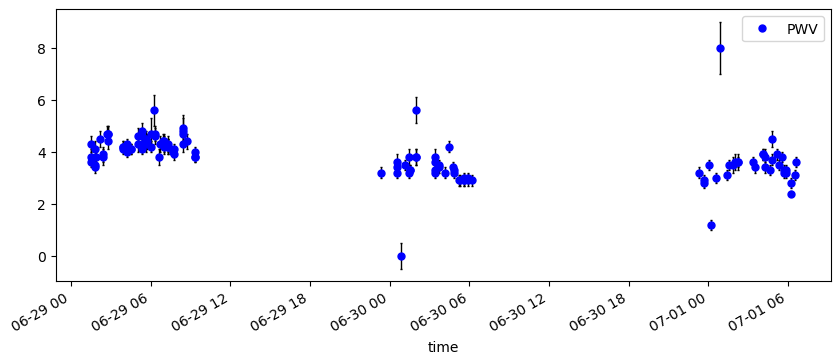

In [19]:
df_extract.plot(y='PWV',yerr="PWV_err",marker='o',lw=0,color='blue',ms=5,ecolor="k",elinewidth=1,capsize = 1, capthick = 1,figsize=(10,4))
#df_extract.plot(y='PWV',yerr="PWV_err",marker='o',lw=0,color='blue',ecolor="k",elinewidth=1,figsize=(10,4))
#OR 
#plt.plot(data.index, data.amount)

In [20]:
#from datetime import datetime
#t1 = pd.DatetimeIndex(data='2022-03-00 00:00:00', '%Y-%m-%d %H:%M:%S')
#t2 = datetime.strptime('2022-04-00 00:00:00', '%Y-%m-%d %H:%M:%S')
#t1 = '2022-03-01 00:00:00'
#t2 = '2022-04-01 00:00:00'
#mask = (df_extract.index > t1) & (df_extract.index < t2)

In [21]:
#df_extract_march = df_extract.loc[mask]

In [22]:
#df_extract_march.plot(y='PWV',marker='o',lw=0,color='blue',figsize=(10,3))

## Aerosols

<AxesSubplot:xlabel='time'>

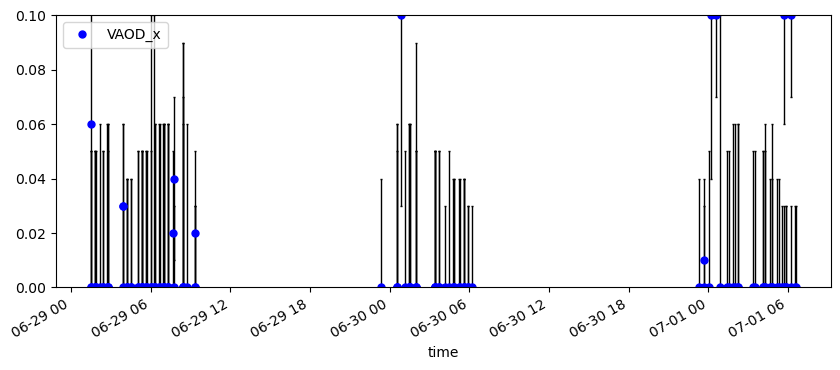

In [23]:
df_extract.plot(y='VAOD_x',yerr='VAOD_err_x',marker='o',lw=0,color='blue',ms=5,figsize=(10,4),ylim=(0,.1),ecolor="k",elinewidth=1,capsize = 1, capthick = 1)

#OR 
#plt.plot(data.index, data.amount)

## Ozone

<AxesSubplot:xlabel='time'>

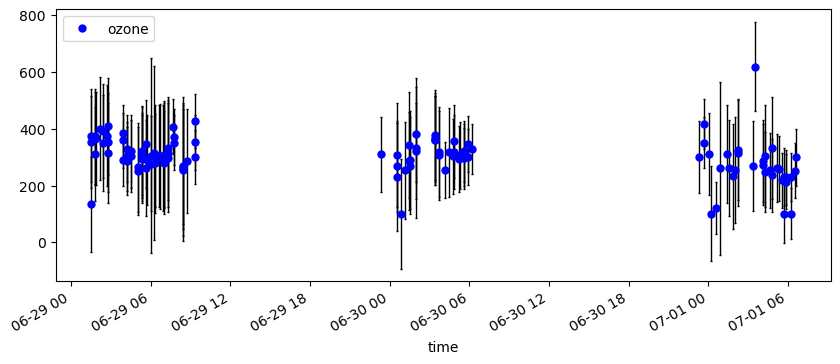

In [24]:
df_extract.plot(y='ozone',yerr="ozone_err",marker='o',lw=0,ecolor="k",color='blue',ms=5,elinewidth=1,capsize = 1, capthick = 1,figsize=(10,4))